In [1]:
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]


list(data.target_names)

['class_0', 'class_1', 'class_2']

In [2]:

import pandas as pd

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
df=pd.DataFrame()

In [6]:
df = pd.DataFrame(data.data, columns = data.feature_names) 


In [7]:
df['target']=data.target

In [8]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [9]:
import numpy as np

In [10]:
res=np.random.multinomial(1, [59.0 / 178.0, 71.0 / 178.0, 48.0 / 178.0])
print(res)
print(res.nonzero()[0][0])

[1 0 0]
0


In [11]:
arr=(df.head(1).values[0][0:13])
temp_array=np.zeros(13)
print(temp_array)
print(temp_array+arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [12]:
df.mean()


alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
dtype: float64

In [13]:
i=0
lista=[]
while(i<13):
    lista.append(df.mean()[i])
    i=i+1
    


In [14]:
print(lista)


[13.000617977528083, 2.336348314606741, 2.3665168539325854, 19.49494382022472, 99.74157303370787, 2.295112359550562, 2.0292696629213474, 0.36185393258426973, 1.5908988764044953, 5.058089882022473, 0.9574494382022468, 2.6116853932584254, 746.8932584269663]


In [23]:
result = pd.DataFrame([], columns = data.feature_names)
k=0
A=np.zeros(13)
weights=[59.0 / 178.0, 71.0 / 178.0, 48.0 / 178.0]
while(k<1000):
    temp_array=np.zeros(13)
    for index, row in df.iterrows():
        res=np.random.multinomial(1, [59.0 / 178.0, 71.0 / 178.0, 48.0 / 178.0])
        if(res.nonzero()[0][0]==row['target']):
            temp_array=temp_array+(weights[res.nonzero()[0][0]])*row.values[0:13]
        else:
            temp_array=temp_array-(1-weights[res.nonzero()[0][0]])*row.values[0:13]
    A = np.vstack([A, temp_array])
    k=k+1
    


In [16]:
print(A[:,7]/13.000618)

[ 0.         -2.80818215 -4.2786734  ... -4.60125521 -3.19072012
 -4.02821941]


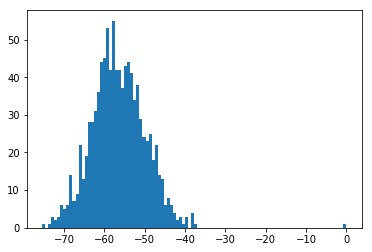

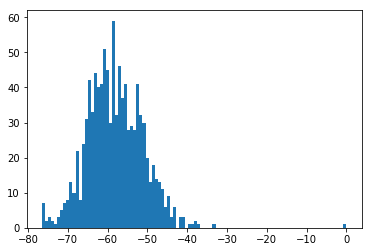

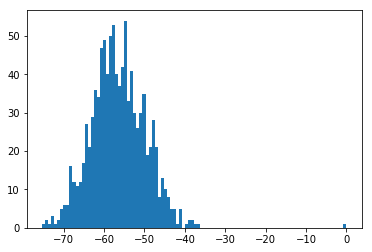

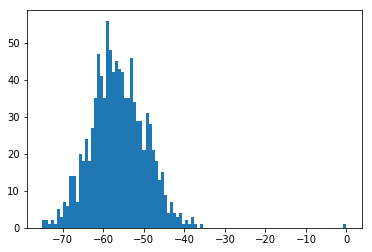

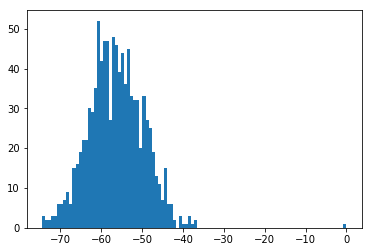

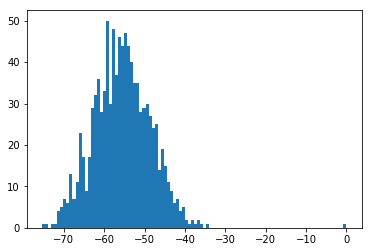

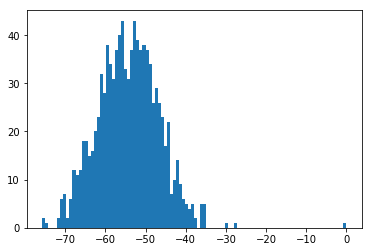

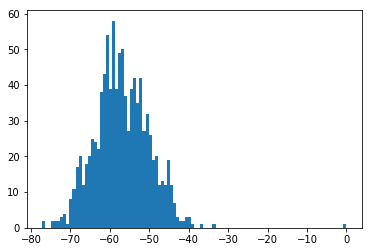

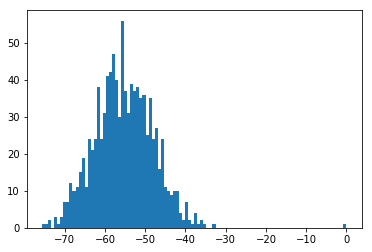

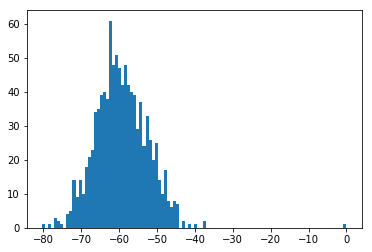

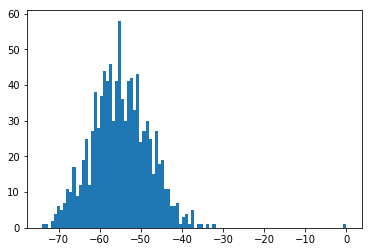

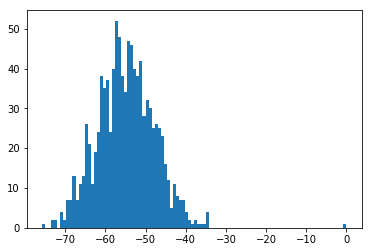

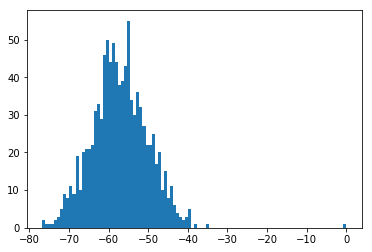

In [24]:
import matplotlib.pyplot as plt
i=0
while(i<13):
    plt.hist(A[:,i]/float(lista[i]), 100)
    plt.show()
    i=i+1
